In [1]:
import itertools
import os
from pathlib import Path

from matplotlib import pyplot

for folder in itertools.chain([Path.cwd()], Path.cwd().parents):
    if (folder / 'Pipfile').exists():
        os.chdir(folder)
        break

import rpy2
from rpy2 import robjects

from default_classification import HEART_TRANSPLANT_EXPANDING_IDENTIFIER, \
    HEART_TRANSPLANT_CV_SHUFFLED_IDENTIFIER
from optimized_classification import HEART_TRANSPLANT_CV_SHUFFLED_NESTED_IDENTIFIER, \
    HEART_TRANSPLANT_EXPANDING_NESTED_IDENTIFIER
from default_survival import HEART_TRANSPLANT_SURVIVAL_CV_SHUFFLED_IDENTIFIER, HEART_TRANSPLANT_SURVIVAL_ROLLING_IDENTIFIER
import warnings

warnings.filterwarnings("ignore")
rpy2.robjects.r['options'](warn=-1)

from include.functional import or_fn

from include.formatting import format_heart_transplant_method_name, set_style

from include.visualisation import savefig

import os
from pathlib import Path

for folder in itertools.chain([Path.cwd()], Path.cwd().parents):
    if (folder / 'Pipfile').exists():
        os.chdir(folder)
        break

from include.data import get_final_binary_dataset
import matplotlib

FIGURES_FOLDER = './data/heart_transplant/figures'
DEFAULT_FIGURE_SIZE = (6, 6)

%load_ext autoreload
%autoreload 2
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams["figure.facecolor"] = 'white'

In [ ]:
X_365, y_365, dataset_raw = get_final_binary_dataset()

X_90, y_90, _ = get_final_binary_dataset(survival_days=90)


In [3]:
def tuned_filter(key: str) -> bool:
    return key.endswith('tuned')


def default_filter(key: str) -> bool:
    return 'tuned' not in key



# Predictive performance

## Shuffled 10-fold CV

### 365 days

#### >= 18 years old

In [4]:
from include.visualisation import display_and_save_tables

display_and_save_tables(
    [HEART_TRANSPLANT_CV_SHUFFLED_IDENTIFIER + '_365_ME_18',
     HEART_TRANSPLANT_SURVIVAL_CV_SHUFFLED_IDENTIFIER + '_365_ME_18'],
    y_365,
    identifier_tuned=[HEART_TRANSPLANT_CV_SHUFFLED_NESTED_IDENTIFIER + '_365_ME_18'],
)

#### < 18 years old

In [5]:
display_and_save_tables(
    [HEART_TRANSPLANT_CV_SHUFFLED_IDENTIFIER + '_365_L_18',
     HEART_TRANSPLANT_SURVIVAL_CV_SHUFFLED_IDENTIFIER + '_365_L_18'],
    y_365,
    identifier_tuned=[HEART_TRANSPLANT_CV_SHUFFLED_NESTED_IDENTIFIER + '_365_L_18'],
)


## Rolling CV

### 365 days

#### < 18 years old

In [6]:
display_and_save_tables(
    [HEART_TRANSPLANT_EXPANDING_IDENTIFIER + '_365_L_18', HEART_TRANSPLANT_SURVIVAL_ROLLING_IDENTIFIER + '_365_L_18'],
    y_365,
    identifier_tuned=[HEART_TRANSPLANT_EXPANDING_NESTED_IDENTIFIER + '_365_L_18']
)

#### >= 18 years old

In [7]:
display_and_save_tables(
    [HEART_TRANSPLANT_EXPANDING_IDENTIFIER + '_365_ME_18', HEART_TRANSPLANT_SURVIVAL_ROLLING_IDENTIFIER + '_365_ME_18'],
    y_365,
    identifier_tuned=[HEART_TRANSPLANT_EXPANDING_NESTED_IDENTIFIER + '_365_ME_18'],
)

### 90 days

#### >= 18 years old

In [8]:
display_and_save_tables(
    [HEART_TRANSPLANT_EXPANDING_IDENTIFIER + '_90_ME_18', HEART_TRANSPLANT_SURVIVAL_ROLLING_IDENTIFIER + '_90_ME_18'],
    y_90,
    identifier_tuned=[HEART_TRANSPLANT_EXPANDING_NESTED_IDENTIFIER + '_90_ME_18'],
)


# ROCs

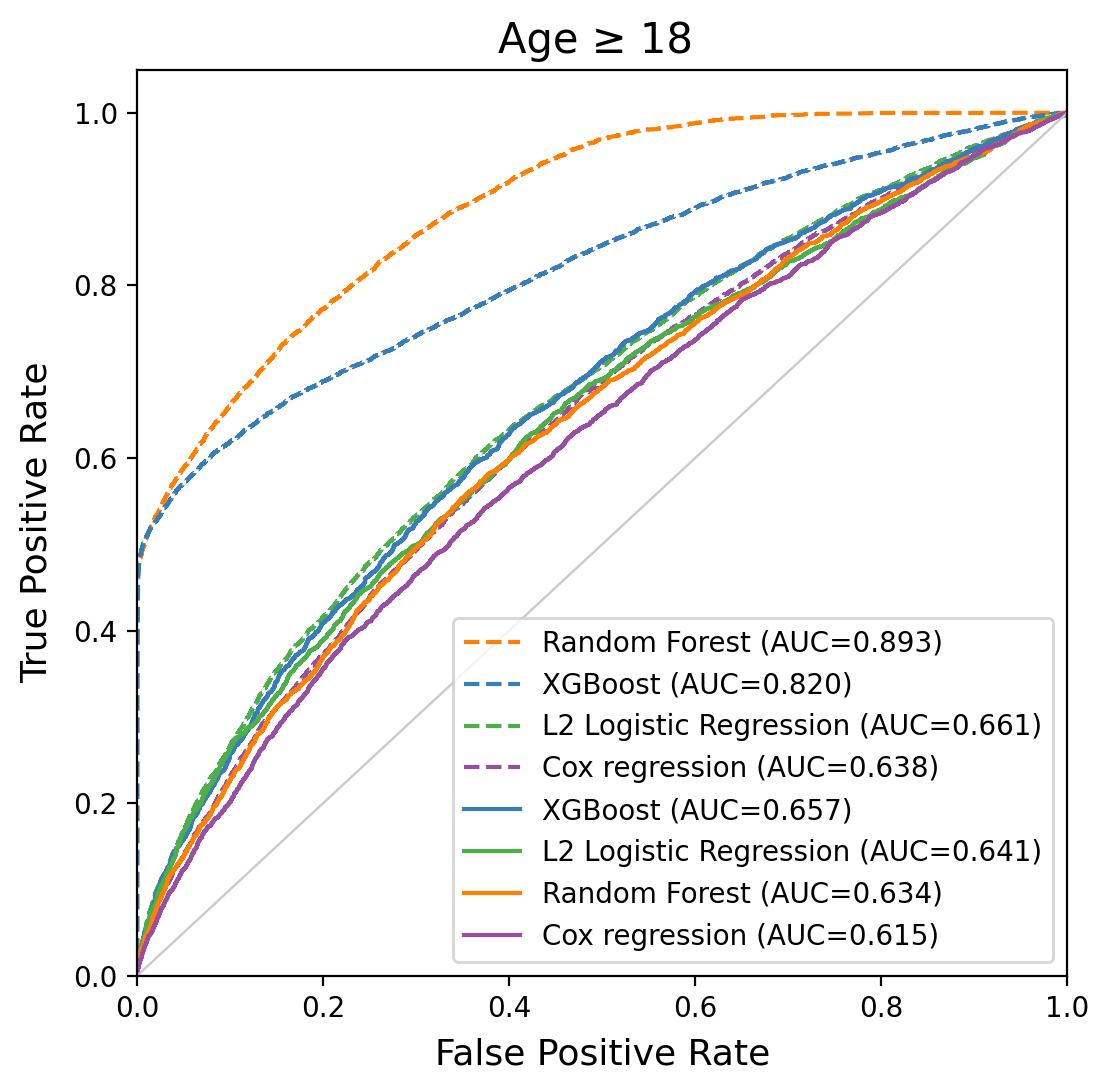

In [9]:

from include.visualisation import display_rocs_base, dashed_style, color_methods_colorblind

figure = pyplot.figure(figsize=DEFAULT_FIGURE_SIZE)

pyplot.title('Age ≥ 18 ', )
set_style()
display_rocs_base(
    HEART_TRANSPLANT_CV_SHUFFLED_NESTED_IDENTIFIER + '_365_ME_18',
    y_365,
    filter_callback=or_fn(tuned_filter),
    style_by_callback=[color_methods_colorblind, dashed_style],
    format_method_name=format_heart_transplant_method_name,
    figure=figure,
)

display_rocs_base(
    HEART_TRANSPLANT_EXPANDING_NESTED_IDENTIFIER + '_365_ME_18',
    y_365,
    filter_callback=or_fn(tuned_filter),
    style_by_callback=[color_methods_colorblind],
    format_method_name=format_heart_transplant_method_name,
    figure=figure,
)

savefig(FIGURES_FOLDER + '/rocs/adult_overview.svg')
figure.show()

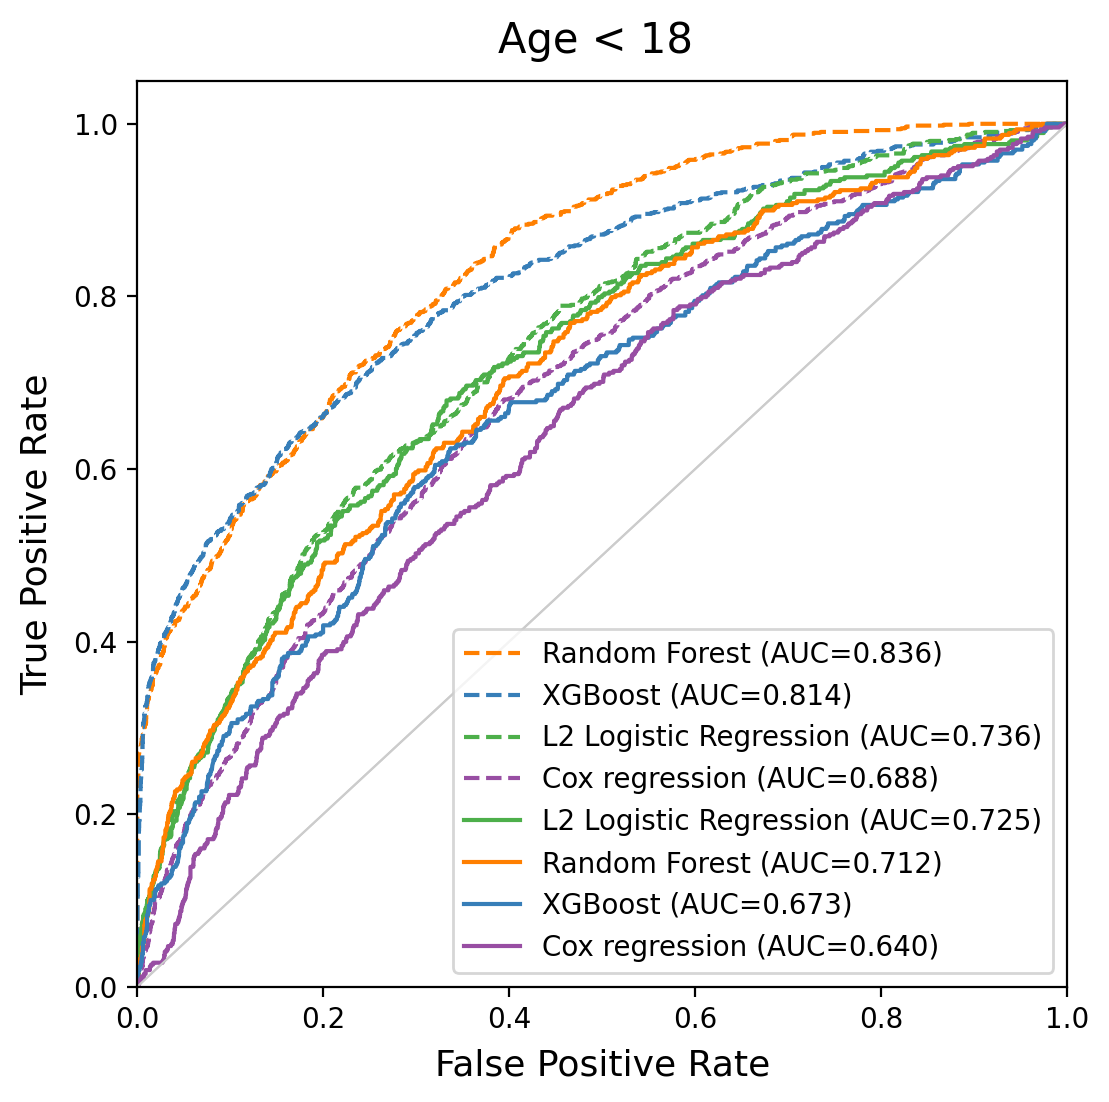

In [10]:
from matplotlib import pyplot

figure = pyplot.figure(figsize=DEFAULT_FIGURE_SIZE)
pyplot.title('Age < 18 ')
set_style()
display_rocs_base(
    HEART_TRANSPLANT_CV_SHUFFLED_NESTED_IDENTIFIER + '_365_L_18',
    y_365,
    filter_callback=or_fn(tuned_filter),
    style_by_callback=[color_methods_colorblind, dashed_style],
    format_method_name=format_heart_transplant_method_name,
    figure=figure,
)

display_rocs_base(
    HEART_TRANSPLANT_EXPANDING_NESTED_IDENTIFIER + '_365_L_18',
    y_365,
    filter_callback=or_fn(tuned_filter),
    style_by_callback=[color_methods_colorblind],
    format_method_name=format_heart_transplant_method_name,
    figure=figure,
)

savefig(FIGURES_FOLDER + '/rocs/pediatrics_overview.svg')

figure.show()

## Shuffled 10-fold CV

### Binary

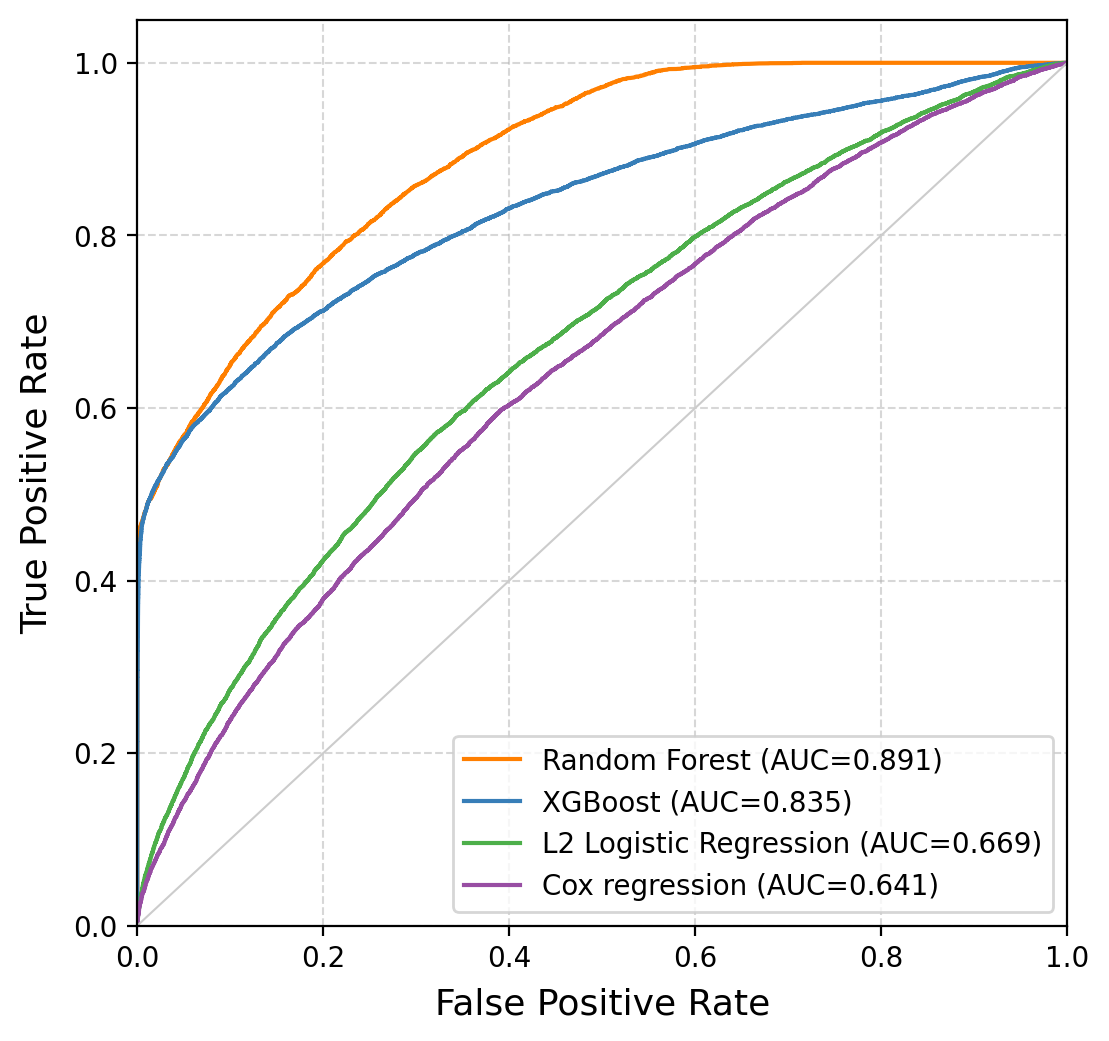

In [11]:
from include.visualisation import display_and_save_rocs

display_and_save_rocs(
    HEART_TRANSPLANT_CV_SHUFFLED_NESTED_IDENTIFIER + '_365_ALL',
    y_365,
)

## Rolling CV

### 365 days

#### All age groups

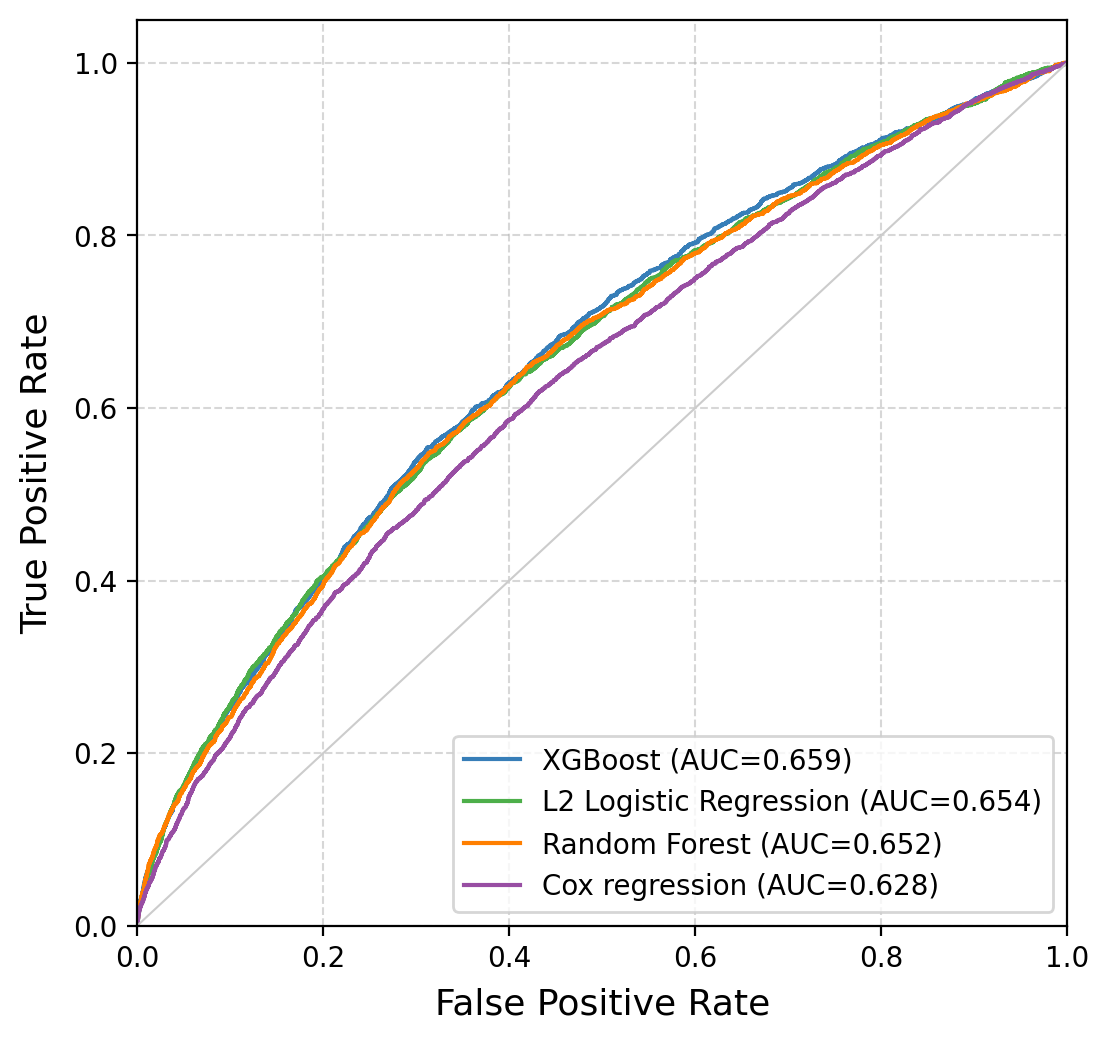

In [12]:
display_and_save_rocs(
    HEART_TRANSPLANT_EXPANDING_NESTED_IDENTIFIER + '_365_ALL',
    y_365,
)

#### < 18 years old

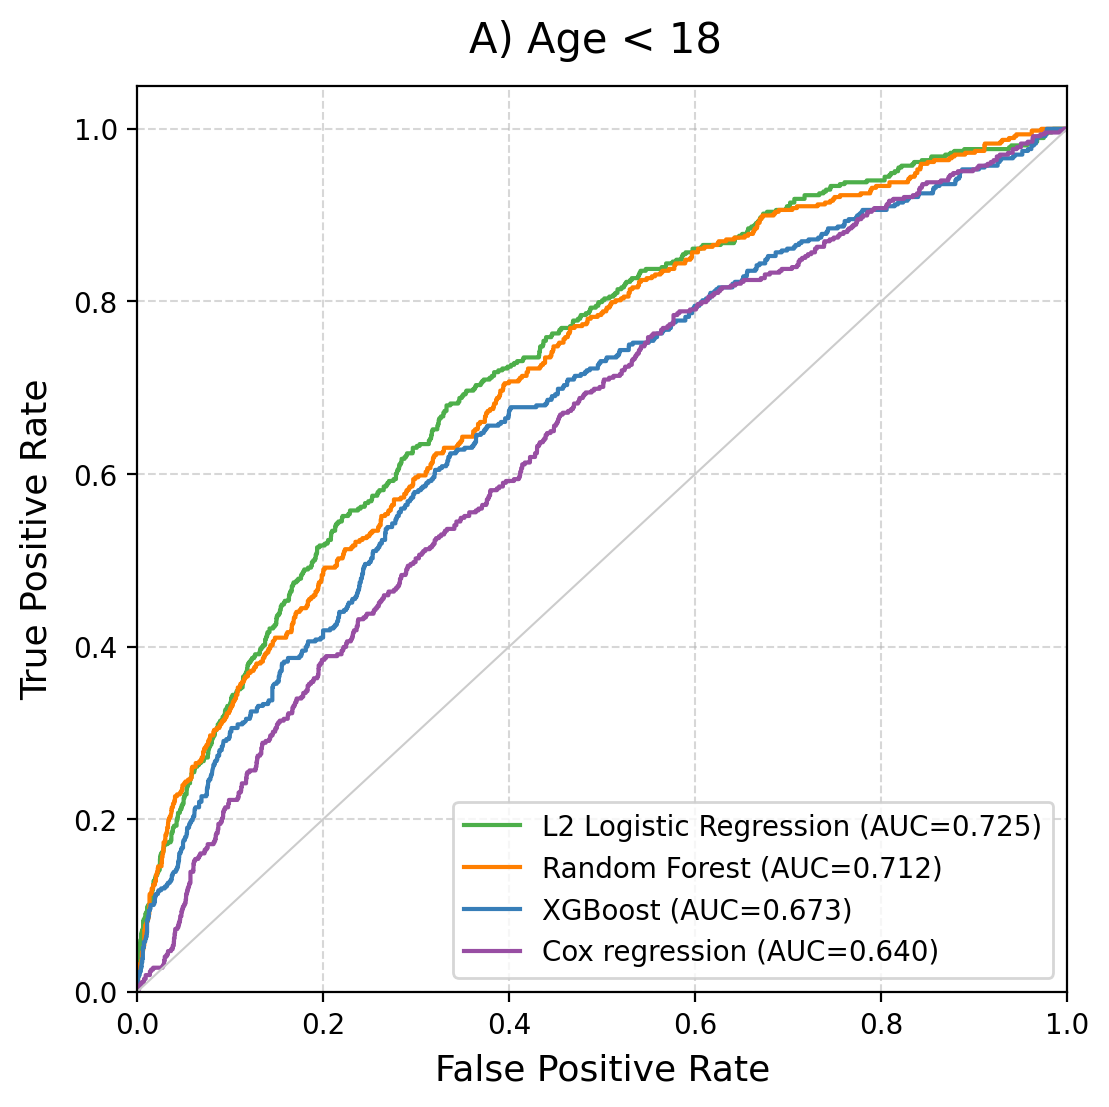

In [13]:
display_and_save_rocs(
    HEART_TRANSPLANT_EXPANDING_NESTED_IDENTIFIER + '_365_L_18',
    y_365,
    title='A) Age < 18 ',
)

#### >= 18 years old

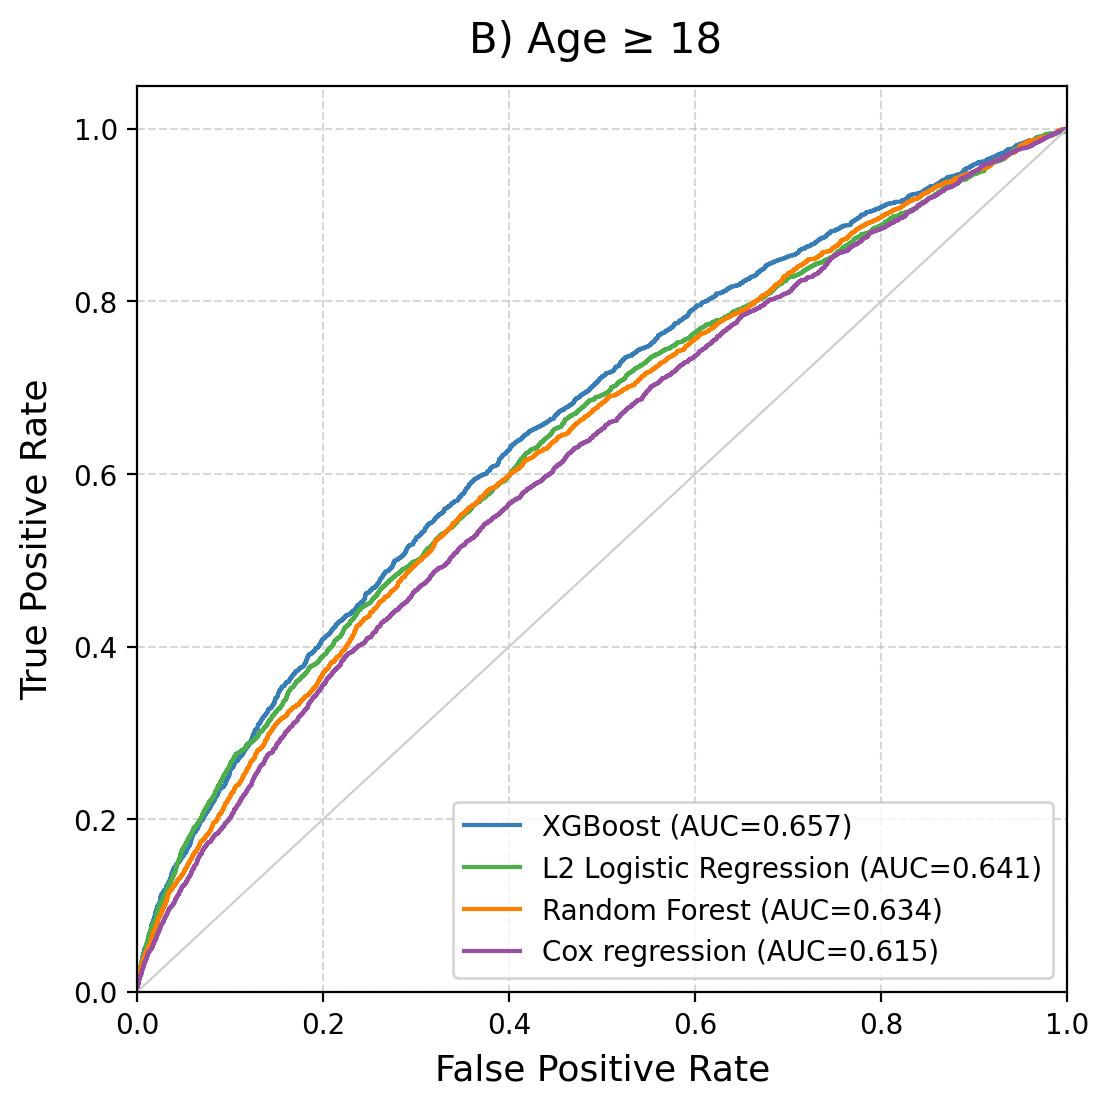

In [14]:
display_and_save_rocs(
    HEART_TRANSPLANT_EXPANDING_NESTED_IDENTIFIER + '_365_ME_18',
    y_365,
    title='B) Age ≥ 18 ',
)


### 90 days

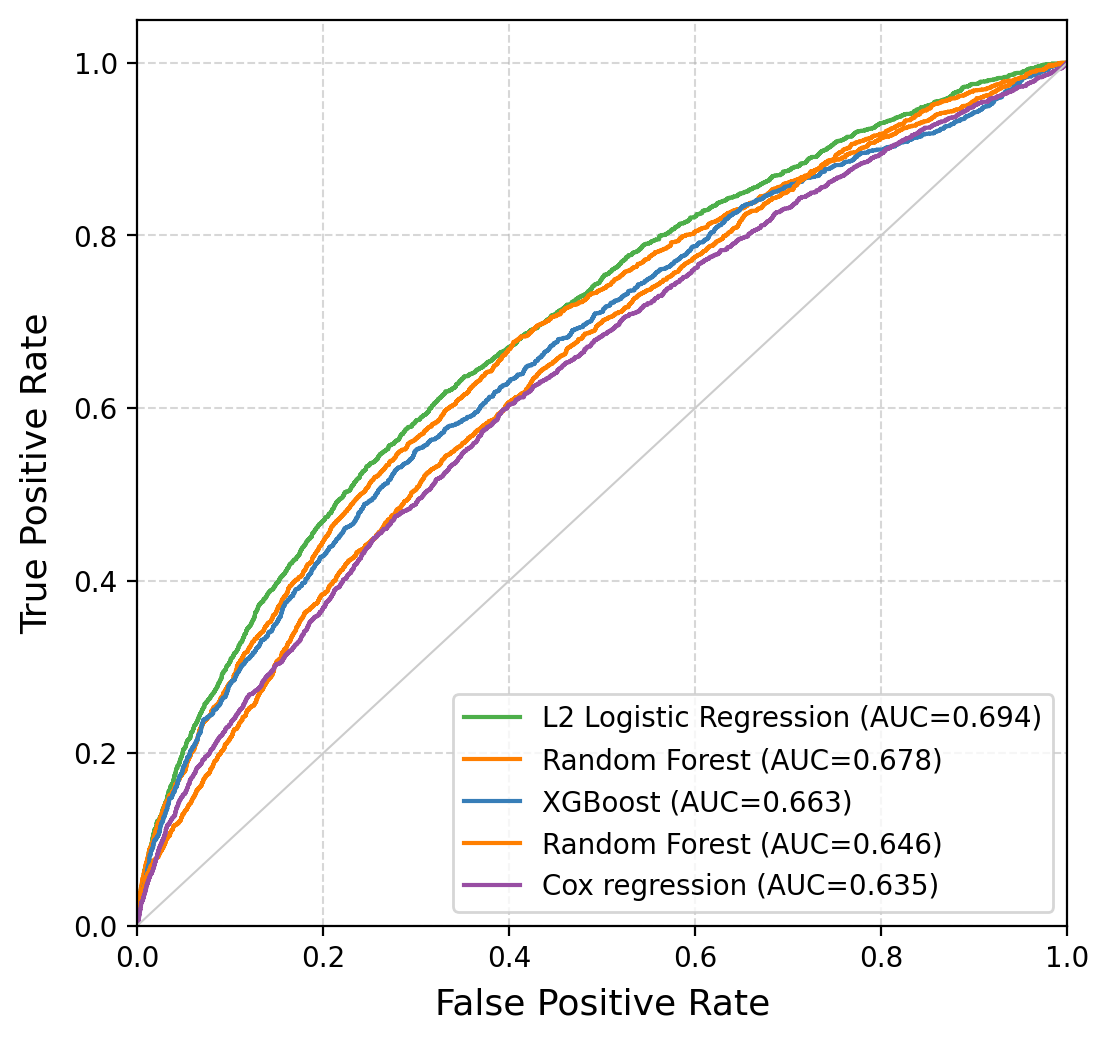

In [15]:
display_and_save_rocs(
    HEART_TRANSPLANT_EXPANDING_NESTED_IDENTIFIER + '_90_ALL',
    y_90,
)


# Calibration plots

## Shuffled 10-fold CV

In [16]:


#

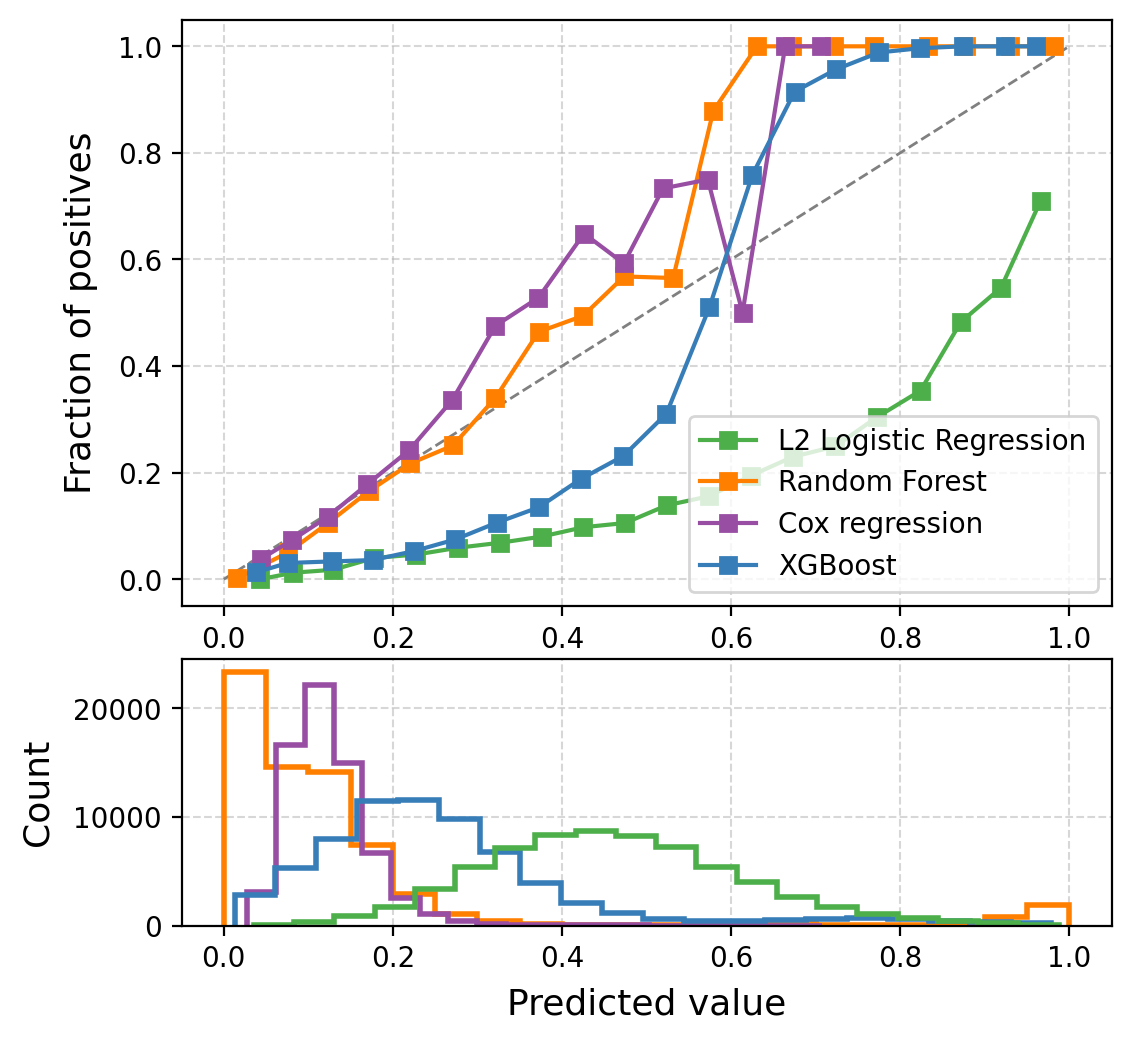

In [17]:
from include.visualisation import display_and_save_calibration_plot

display_and_save_calibration_plot(
    [HEART_TRANSPLANT_CV_SHUFFLED_NESTED_IDENTIFIER + '_365_ALL',
     HEART_TRANSPLANT_SURVIVAL_CV_SHUFFLED_IDENTIFIER + '_365_ALL'],
    y_365,
    filter_callback=or_fn(tuned_filter, lambda name: name in (
    'survival_random_forest_default', 'survival_gradient_boosting_default')),
    style_by_callback=[color_methods_colorblind]
)

## Rolling window CV

### 365 days

#### All age groups

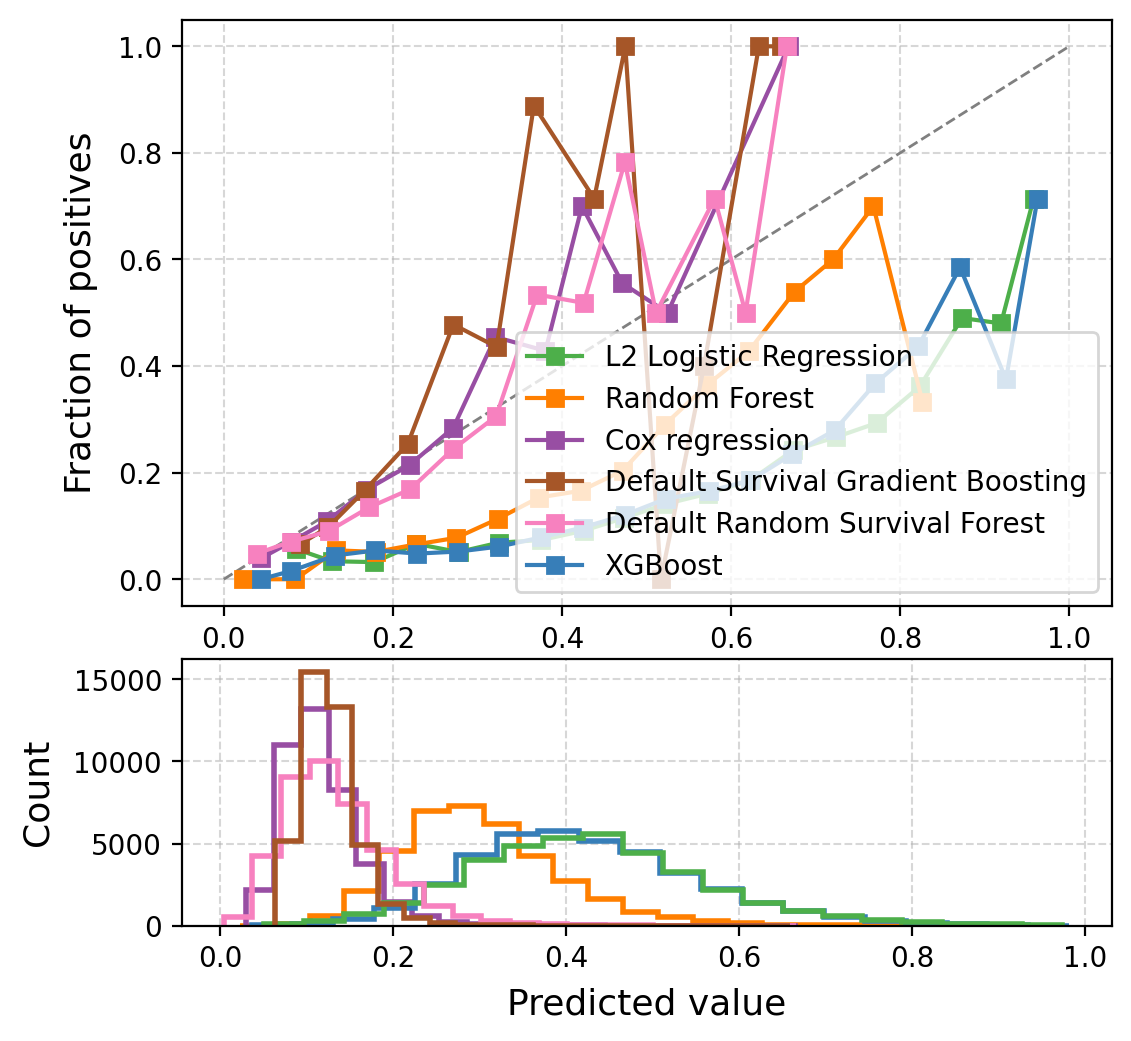

In [18]:
display_and_save_calibration_plot(
    [HEART_TRANSPLANT_EXPANDING_NESTED_IDENTIFIER + '_365_ALL',
     HEART_TRANSPLANT_SURVIVAL_ROLLING_IDENTIFIER + '_365_ALL'],
    y_365,
    filter_callback=or_fn(tuned_filter, lambda name: name in (
    'survival_random_forest_default', 'survival_gradient_boosting_default')),
    style_by_callback=[color_methods_colorblind]
)

#### < 18 years old

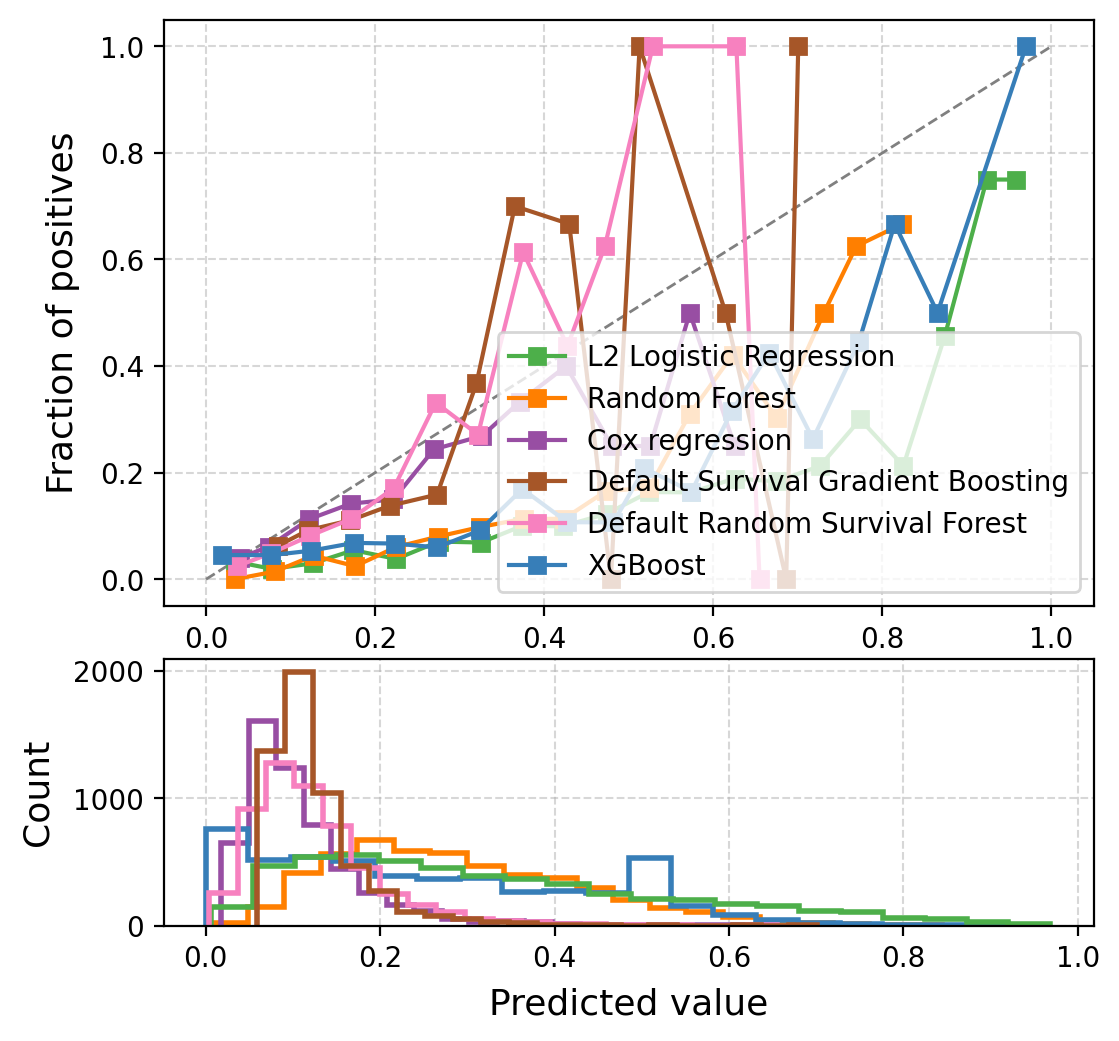

In [19]:
display_and_save_calibration_plot(
    [HEART_TRANSPLANT_EXPANDING_NESTED_IDENTIFIER + '_365_L_18',
     HEART_TRANSPLANT_SURVIVAL_ROLLING_IDENTIFIER + '_365_L_18'],
    y_365,
    filter_callback=or_fn(tuned_filter, lambda name: name in (
    'survival_random_forest_default', 'survival_gradient_boosting_default')),
    style_by_callback=[color_methods_colorblind]
)

#### >= 18 years old

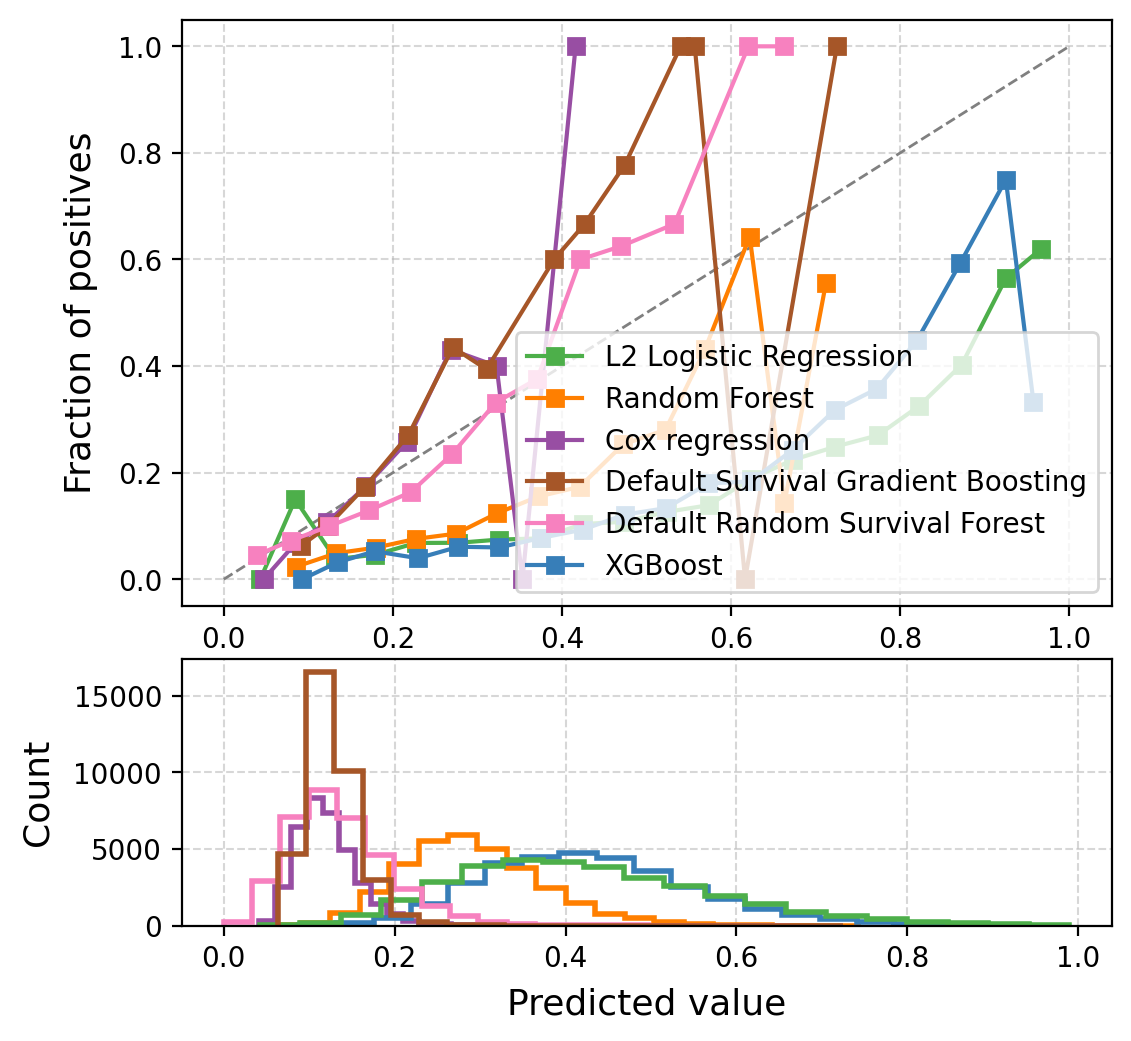

In [20]:
display_and_save_calibration_plot(
    [HEART_TRANSPLANT_EXPANDING_NESTED_IDENTIFIER + '_365_ME_18',
     HEART_TRANSPLANT_SURVIVAL_ROLLING_IDENTIFIER + '_365_ME_18'],
    y_365,
    filter_callback=or_fn(tuned_filter, lambda name: name in (
    'survival_random_forest_default', 'survival_gradient_boosting_default')),
    style_by_callback=[color_methods_colorblind]
)

### 90 days

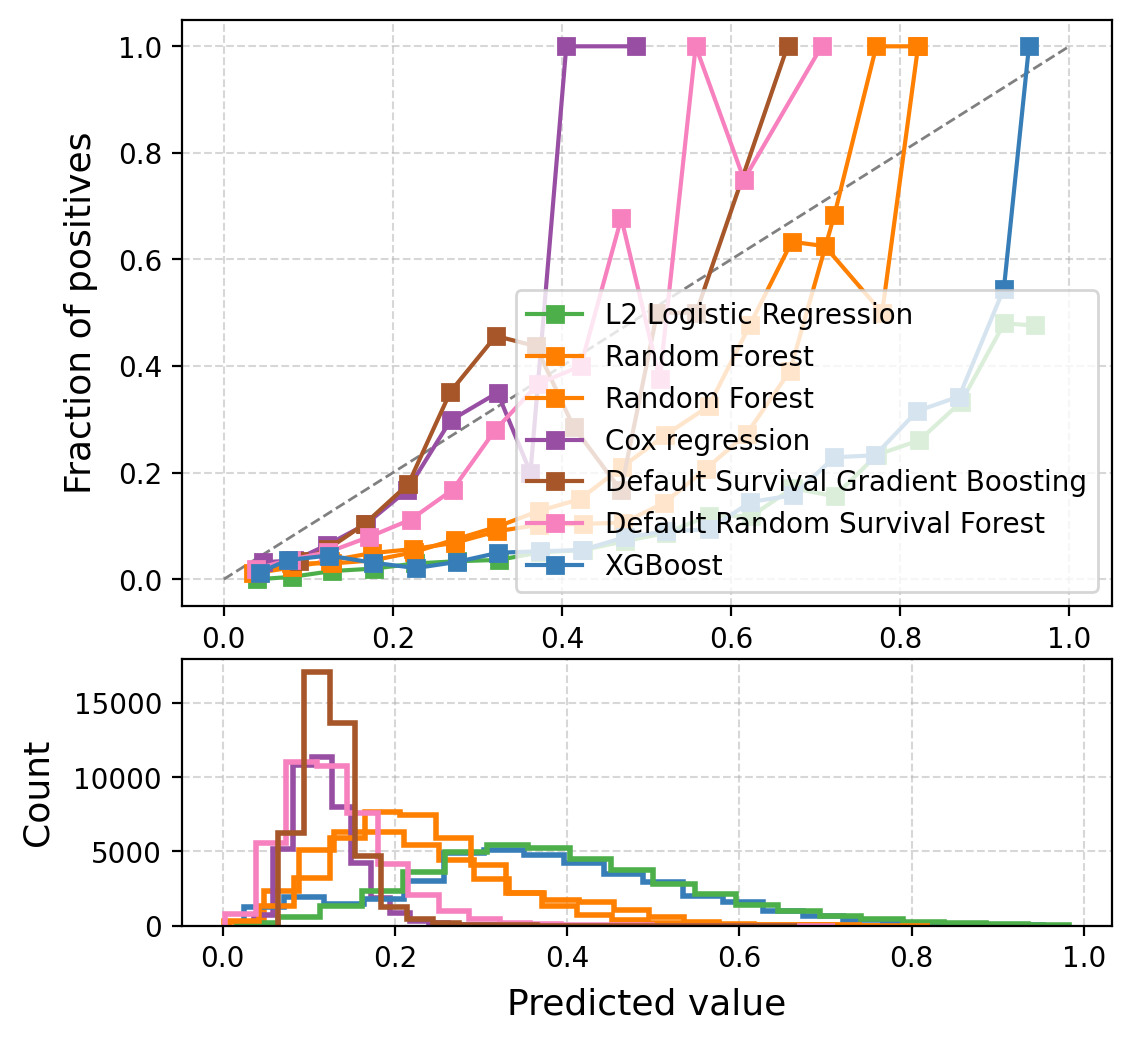

In [21]:
display_and_save_calibration_plot(
    [HEART_TRANSPLANT_EXPANDING_NESTED_IDENTIFIER + '_90_ALL',
     HEART_TRANSPLANT_SURVIVAL_ROLLING_IDENTIFIER + '_90_ALL'],
    y_90,
    filter_callback=or_fn(tuned_filter, lambda name: name in (
    'survival_random_forest_default', 'survival_gradient_boosting_default')),
    style_by_callback=[color_methods_colorblind]
)


# Feature importance

## Shuffled 10-fold CV

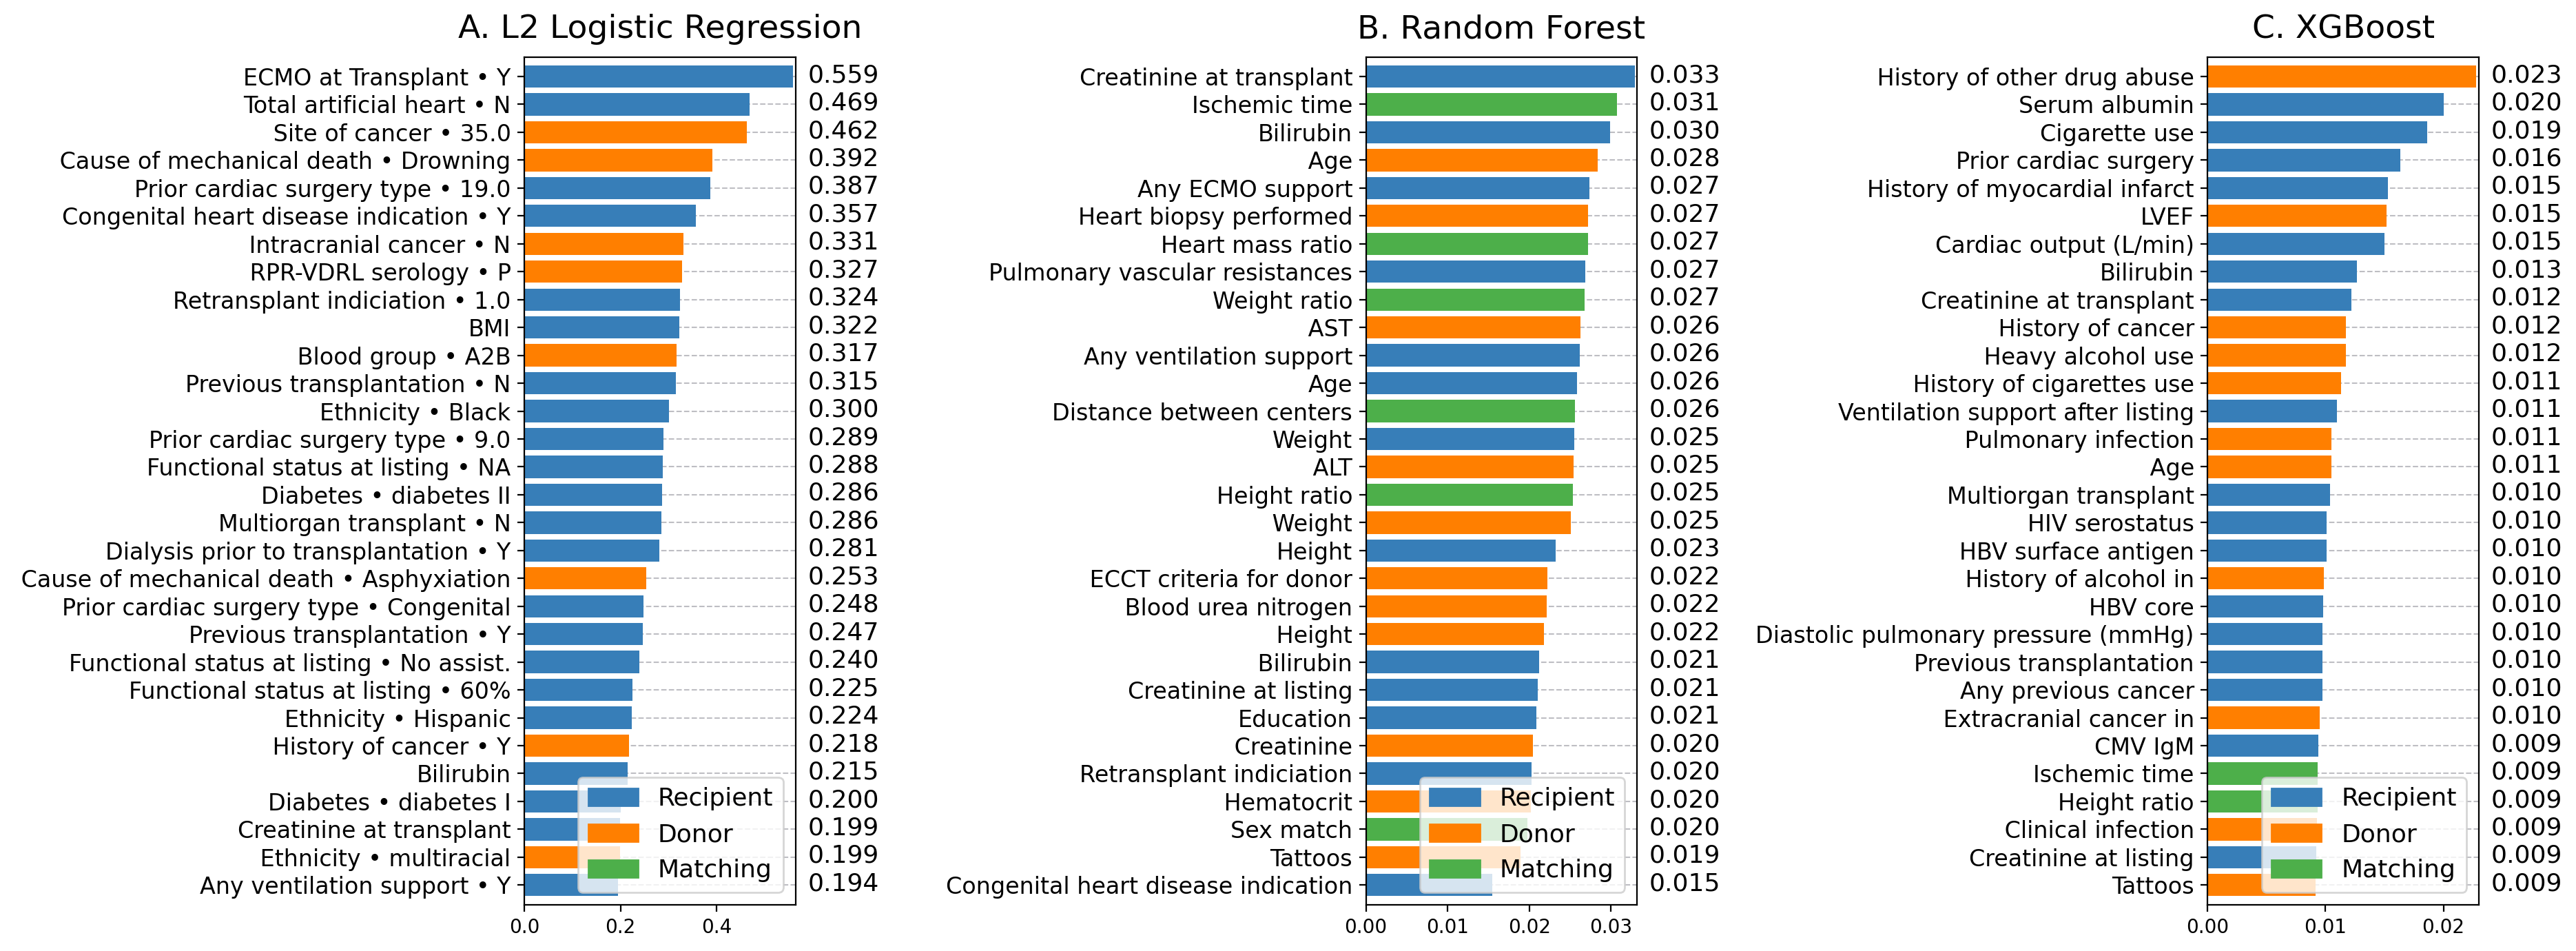

In [24]:
from include.visualisation import display_and_save_feature_importance

feature_importance_method_order = ['l2_logistic_regression_tuned', 'random_forest_tuned', 'xgboost_tuned']

display_and_save_feature_importance(
    HEART_TRANSPLANT_CV_SHUFFLED_NESTED_IDENTIFIER + '_365_ME_18',
    filter_callback=tuned_filter,
    format_method_name=format_heart_transplant_method_name,
    method_order=feature_importance_method_order,
)

## Rolling window CV

### 365 days

In [25]:
#### All age groups

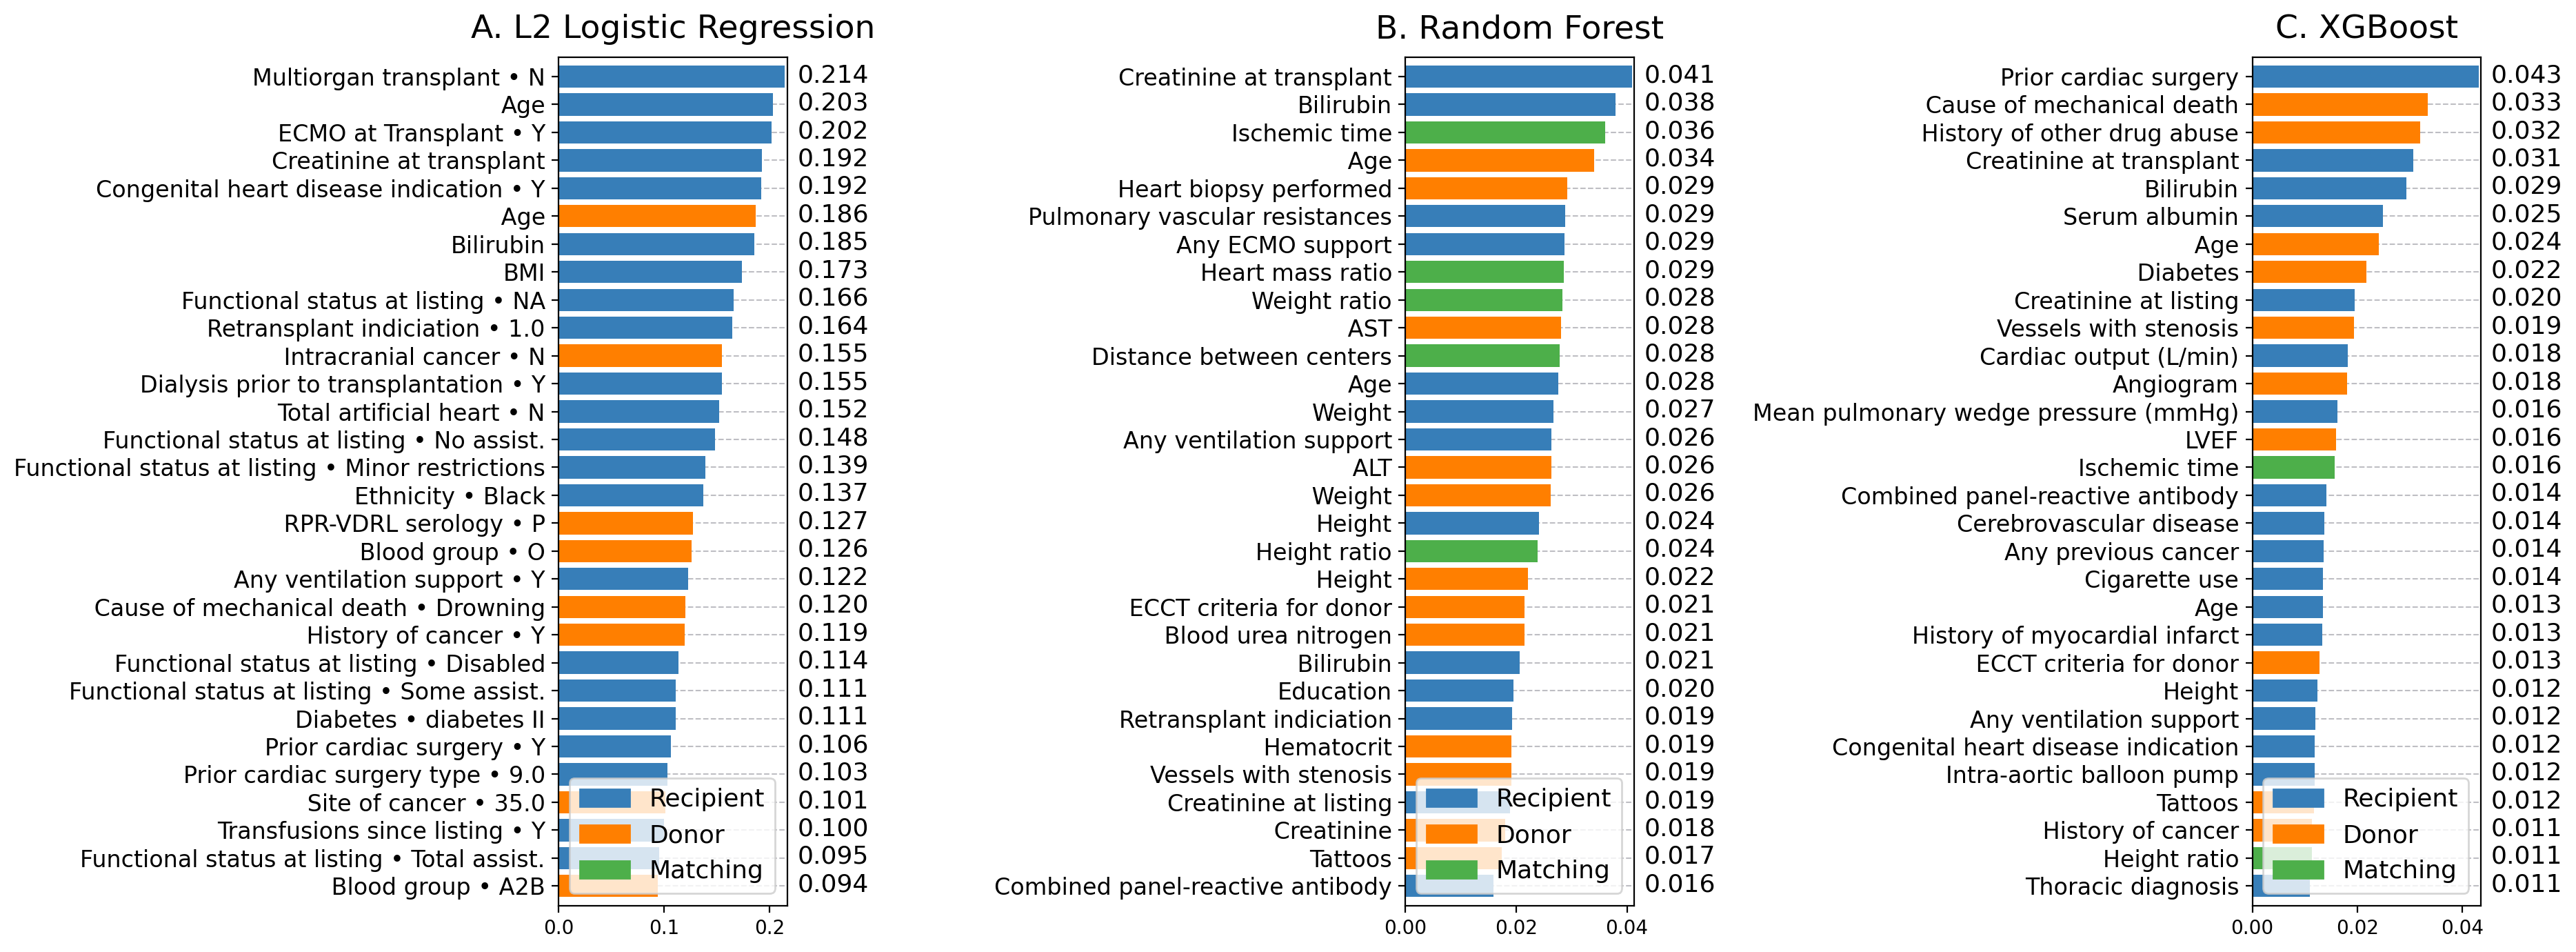

In [26]:
display_and_save_feature_importance(
    HEART_TRANSPLANT_EXPANDING_NESTED_IDENTIFIER + '_365_ALL',
    filter_callback=tuned_filter,
    format_method_name=format_heart_transplant_method_name,
    method_order=feature_importance_method_order,
)

#### < 18 years old

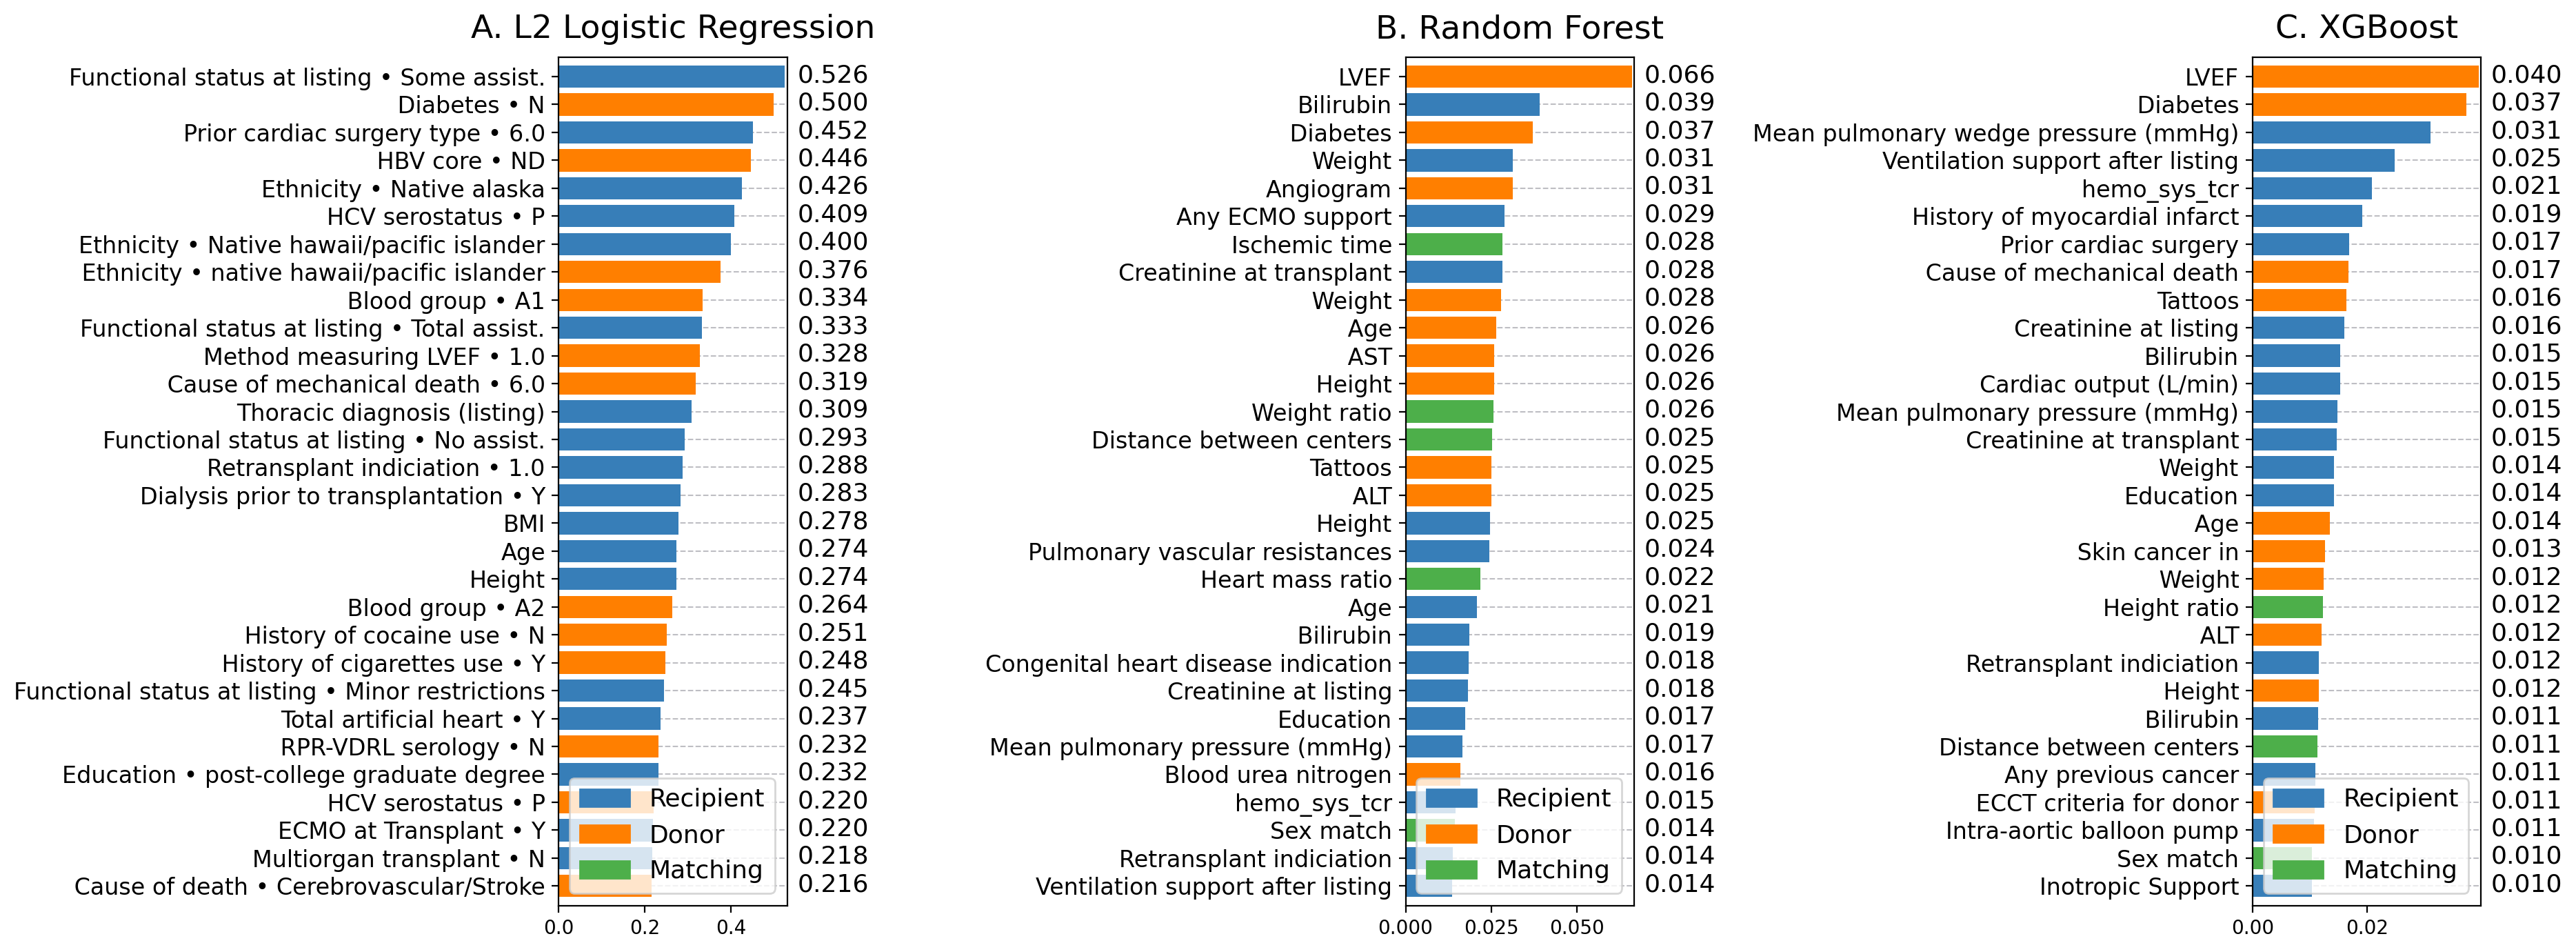

In [27]:
display_and_save_feature_importance(
    HEART_TRANSPLANT_EXPANDING_NESTED_IDENTIFIER + '_365_L_18',
    filter_callback=tuned_filter,
    format_method_name=format_heart_transplant_method_name,
    method_order=feature_importance_method_order,
)

#### >= 18 years old

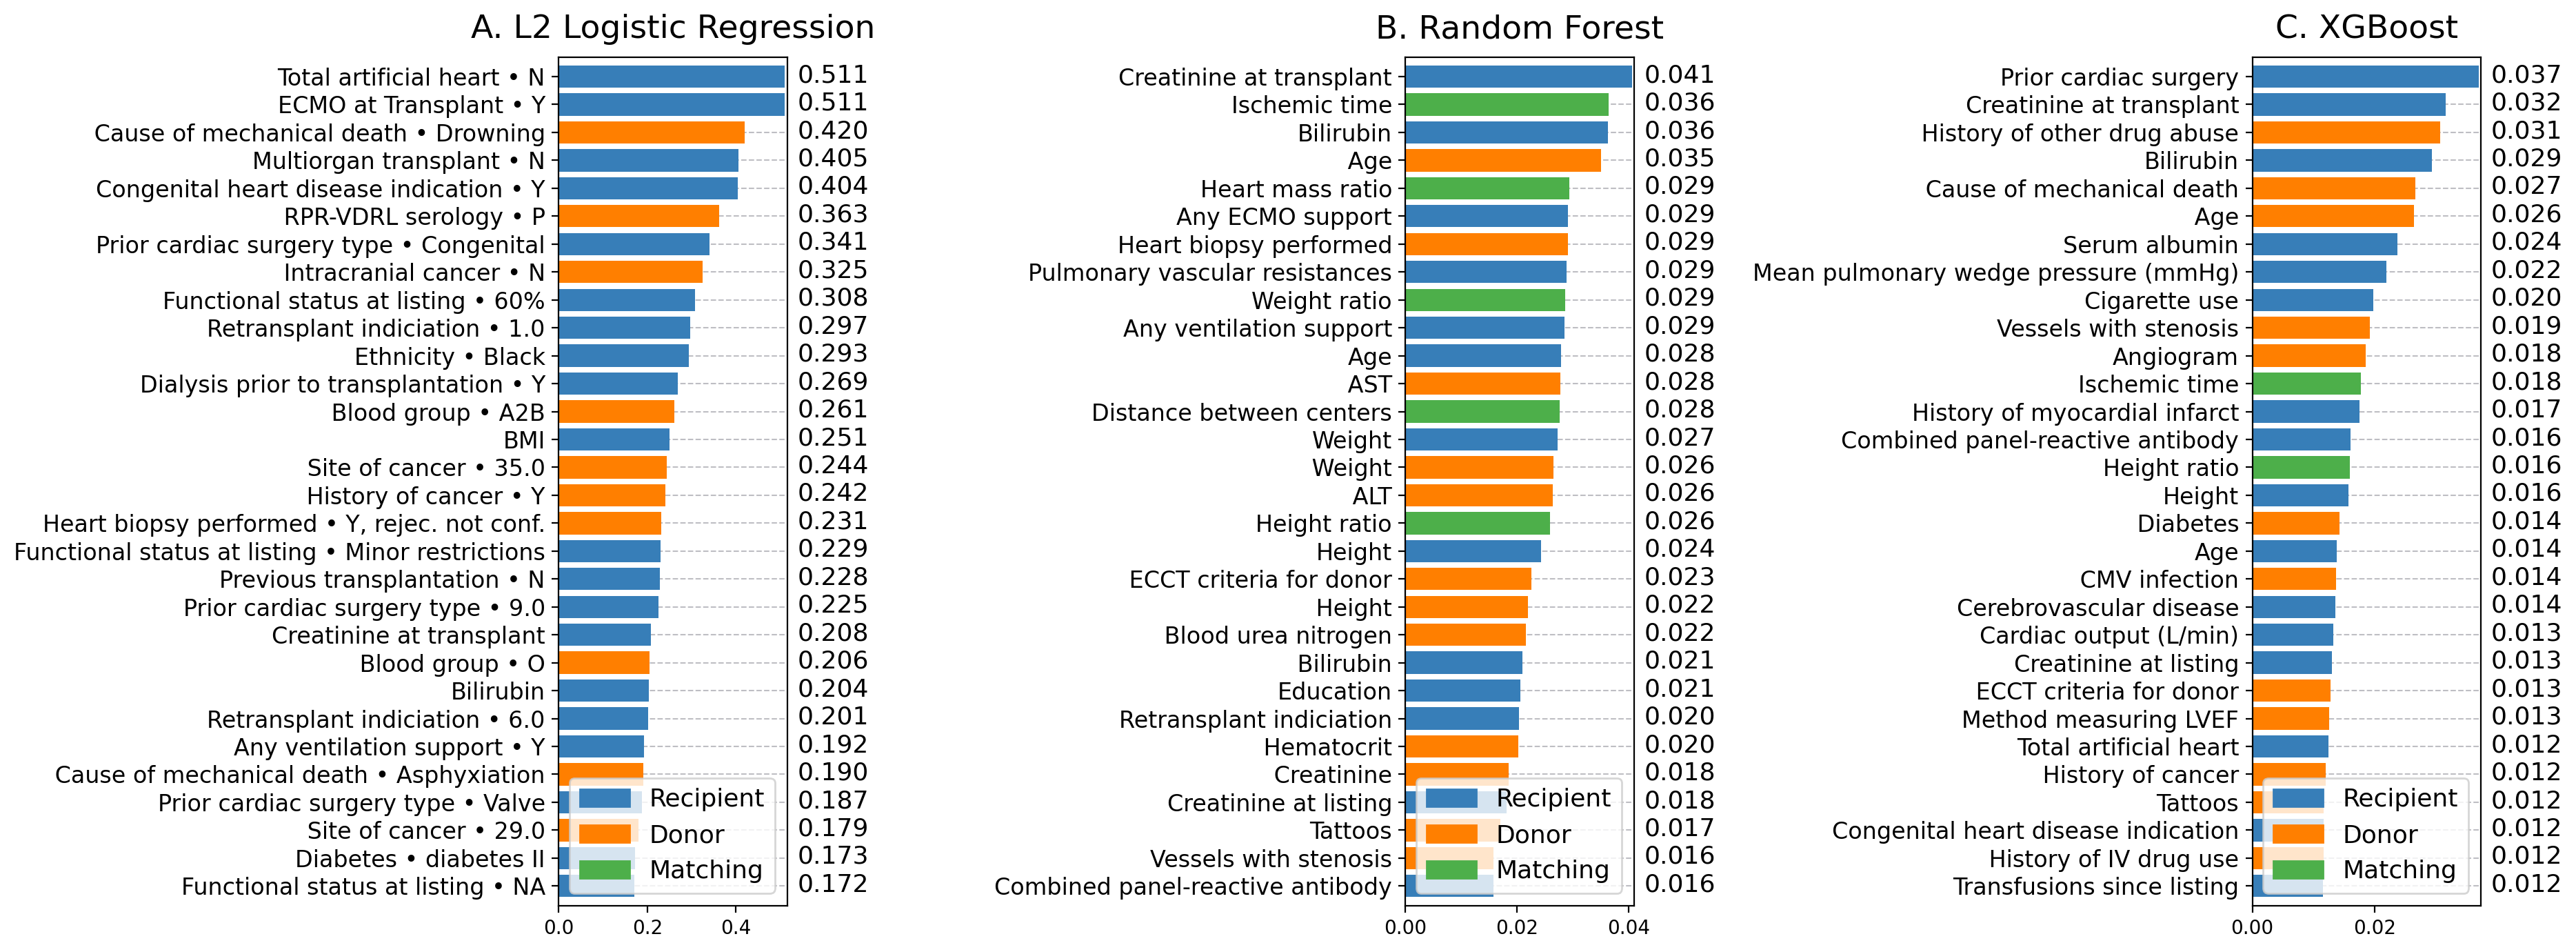

In [28]:
display_and_save_feature_importance(
    HEART_TRANSPLANT_EXPANDING_NESTED_IDENTIFIER + '_365_ME_18',
    filter_callback=tuned_filter,
    format_method_name=format_heart_transplant_method_name,
    method_order=feature_importance_method_order,
)


### 90 days

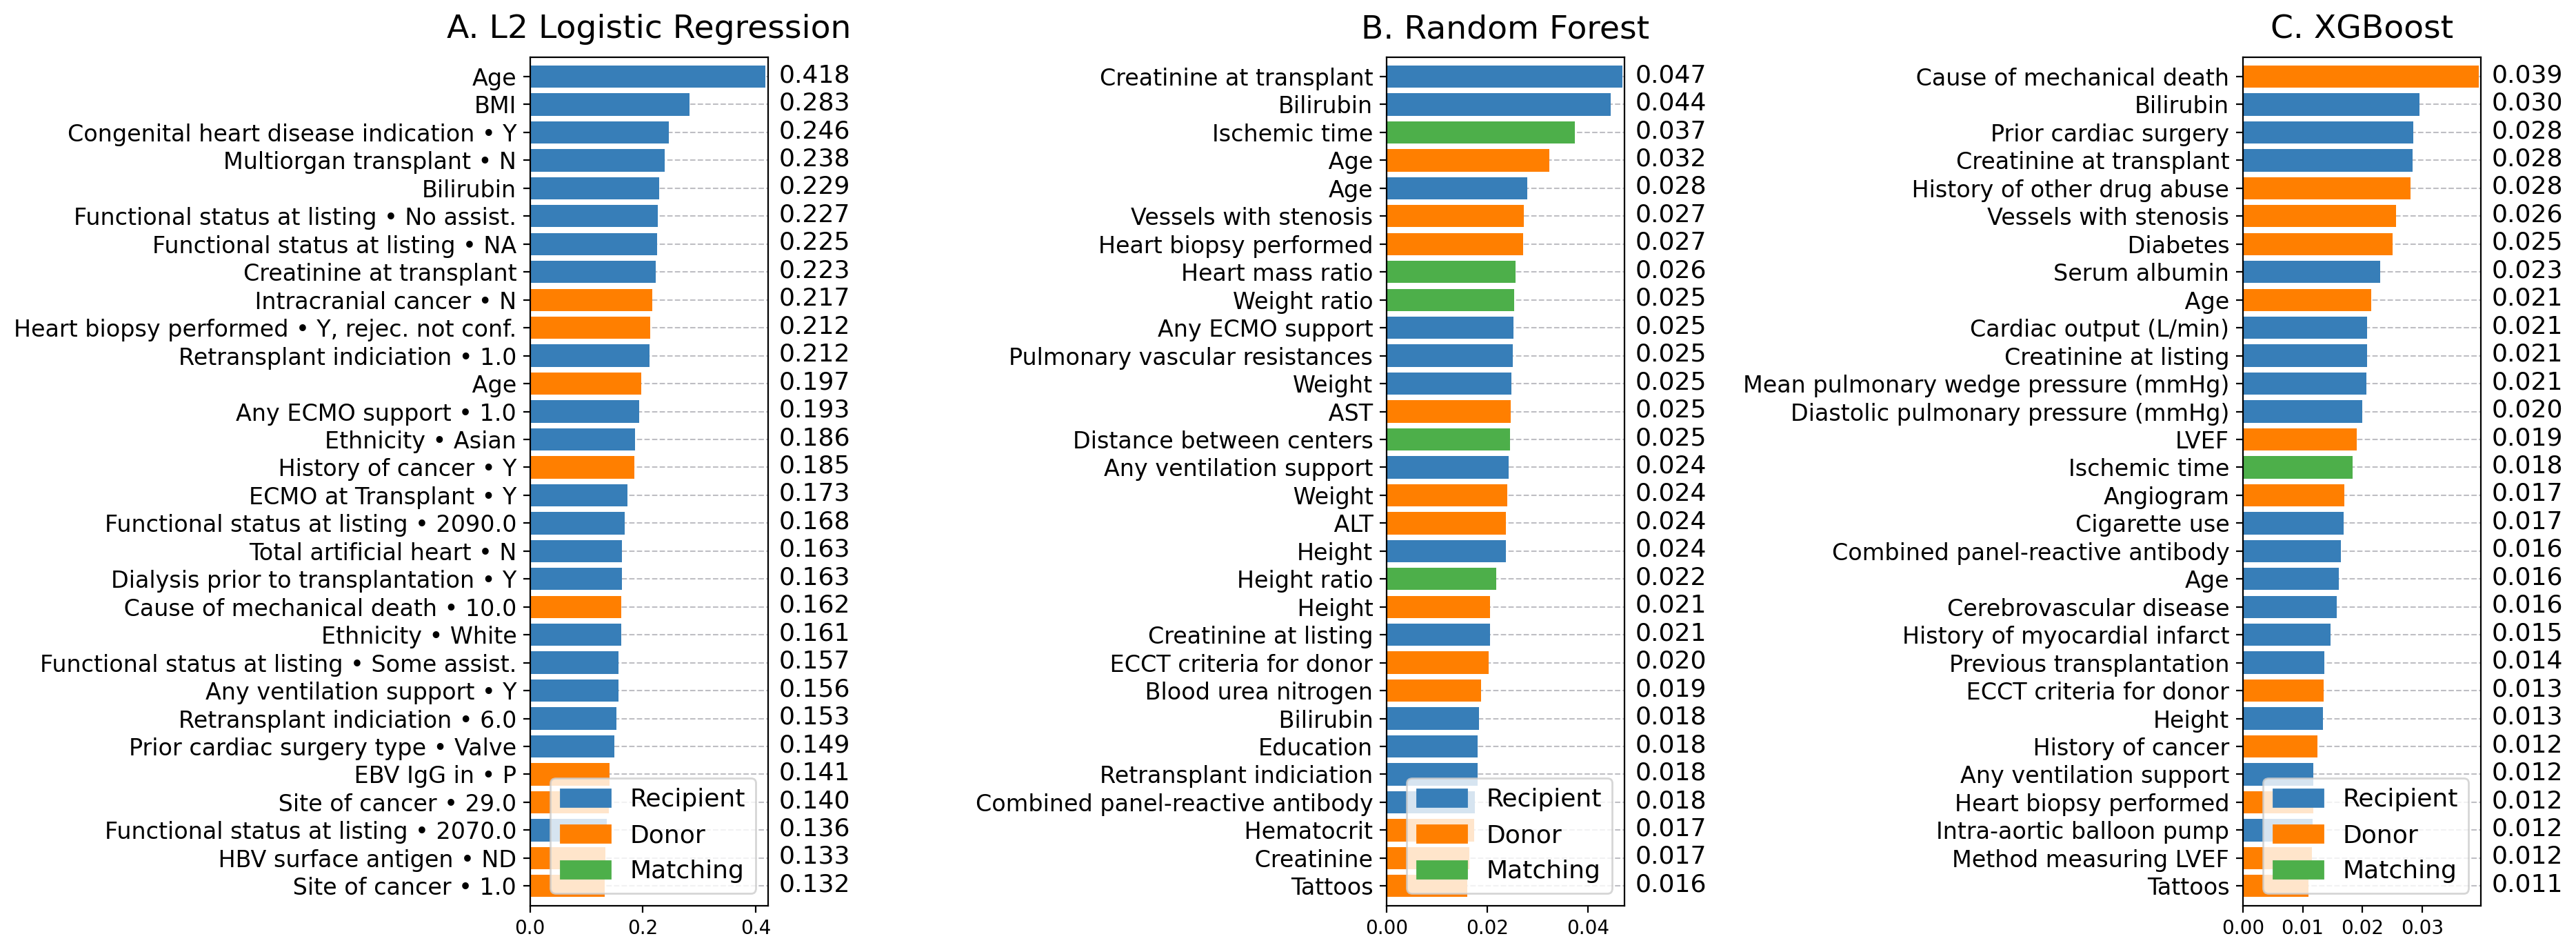

In [29]:
display_and_save_feature_importance(
    HEART_TRANSPLANT_EXPANDING_NESTED_IDENTIFIER + '_90_ALL',
    filter_callback=tuned_filter,
    format_method_name=format_heart_transplant_method_name,
    method_order=feature_importance_method_order,
)